# EDA ( Explorletery Data Analysis)
  
    After cleaning all Tables And merge all dataset (customer Transcation table, customer Demographical, Customer Adress
    RFM Table), after merging we will do the EDA In details.,

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
new_cust = pd.read_csv('NewCustomerList_Cleaned.csv')
cust_trans_rfm = pd.read_csv('Customer_Trans_RFM_Analysis.csv')

In [3]:
new_cust.head(2)

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value,Age,Age_group
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,14,45 Shopko Center,4500,QLD,Australia,6,1,1.71875,66,60-70
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,16,14 Mccormick Park,2113,NSW,Australia,11,1,1.71875,53,50-60


In [4]:
cust_trans_rfm.head(2)

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,Frequency,Monetary,r_quartile,f_quartile,m_quartile,RFM_Score,Customer_title,Age_group,detail_cust_title,rank
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,...,3,645.99,2,1,1,211,Bronze,60-70,Almost Lost Customer,9
1,11065,1,2950,2017-10-16,0.0,Approved,Giant Bicycles,Standard,medium,medium,...,3,645.99,2,1,1,211,Bronze,60-70,Almost Lost Customer,9


### 1) Profit by Age Group

    After this Analysed , we found that-
    a) Most of the profit generate by age group 40 -50
    b) Highest profitable age group followed by 50-60, 30-40 and 60-70
    c) HIghest number customer are female than male

<Axes: xlabel='Age_group', ylabel='Profit'>

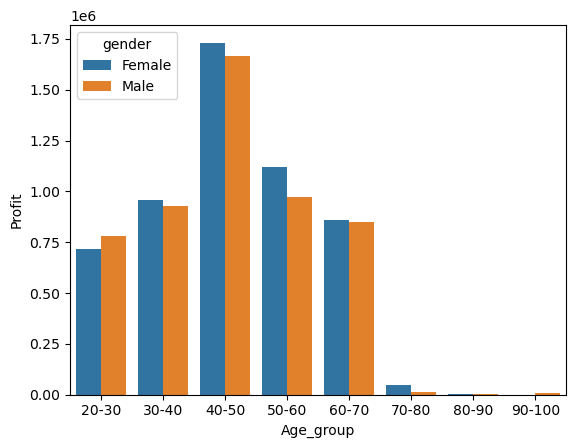

In [25]:
x = cust_trans_rfm.groupby(['Age_group', 'gender'])['Profit'].sum().reset_index()
sns.barplot(x = 'Age_group', y = 'Profit', data = x, hue = 'gender')

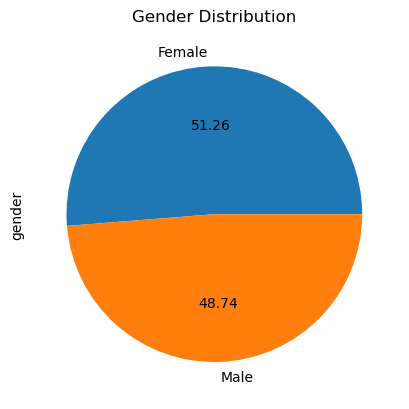

In [28]:
cust_trans_rfm['gender'].value_counts().plot(kind = 'pie', autopct = '%.2f')
plt.title('Gender Distribution');

### 2) New Customer Vs Old Customer

    AFter The Analysis Both the Table we found something like Highest Age Customer and lowest age customer
    who will helped in targeting marketing 
    
    a) Highest Customer Age lies between 40-50 in Old and New Customers Dataset.
    b) lowest Customer Age lies 80 +, and under 20 in Both dataset.
    c) New Customer lies with highest age bracket is 50-60, 60-70
    d) Old Customer lies with Highest age bracket in 50-60, 30-40
     

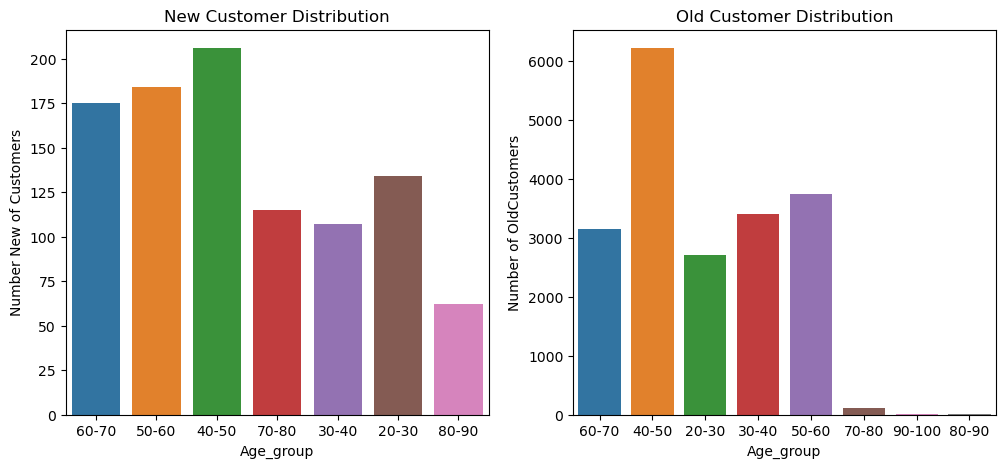

In [30]:
plt.figure(figsize = (12,5))
plt.subplot(1,2,1)
sns.countplot(x = 'Age_group', data = new_cust)
plt.title('New Customer Distribution')
plt.ylabel('Number New of Customers')

plt.subplot(1,2,2)
sns.countplot(x = 'Age_group', data = cust_trans_rfm)
plt.title('Old Customer Distribution')
plt.ylabel('Number of OldCustomers');

### 3) Male vs Female Past 3 year Bike purchese

    AFter the Analysis we found that
    a) Past 3 yaer Almost 50.5 % buyer are woman and 49.5% are male buyer
    b) Number of Female round 10000 more as compare to Male,
    c) In Majority Female is most Customer for bikes

In [16]:
total_Bike_by_gender = cust_trans_rfm.groupby('gender')[['past_3_years_bike_related_purchases']].sum().reset_index()

In [11]:
total = cust_trans_rfm['past_3_years_bike_related_purchases'].sum()

In [18]:
total_Bike_by_gender['Percent_total'] = round((total_Bike_by_gender['past_3_years_bike_related_purchases'] * 100) /total,2)

In [19]:
total_Bike_by_gender

,gender,past_3_years_bike_related_purchases,Percent_total
0,Female,478488,50.5
1,Male,468943,49.5


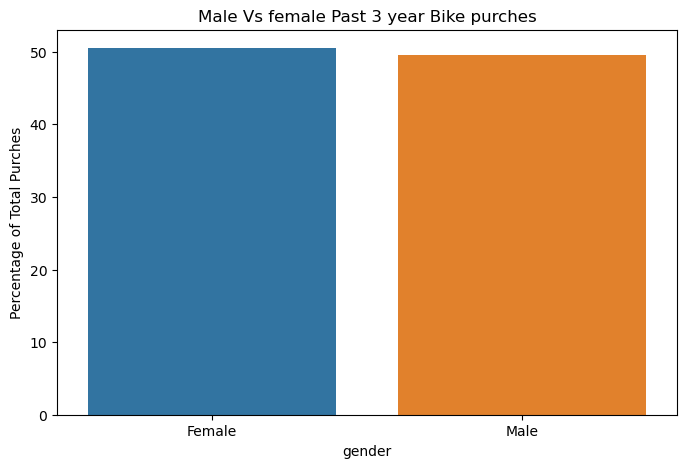

In [26]:
plt.figure(figsize = (8,5))
sns.barplot(x = 'gender', y = 'Percent_total', data = total_Bike_by_gender )
plt.title('Male Vs female Past 3 year Bike purches')
plt.ylabel('Percentage of Total Purches');

### 4. Job Industry Customer Distribution

    According Dataset we Analysis New customer and old Customer-
    a) Among a Old Customer we Analysed that Most of the sales comes from having job
       in ( Manufacturing, Finance and Health)
    
    b) and New Customer also follow the trend like Old customer;
    c) lowes sales comes from customer having job title (telecommunication, IT, Agriculter)

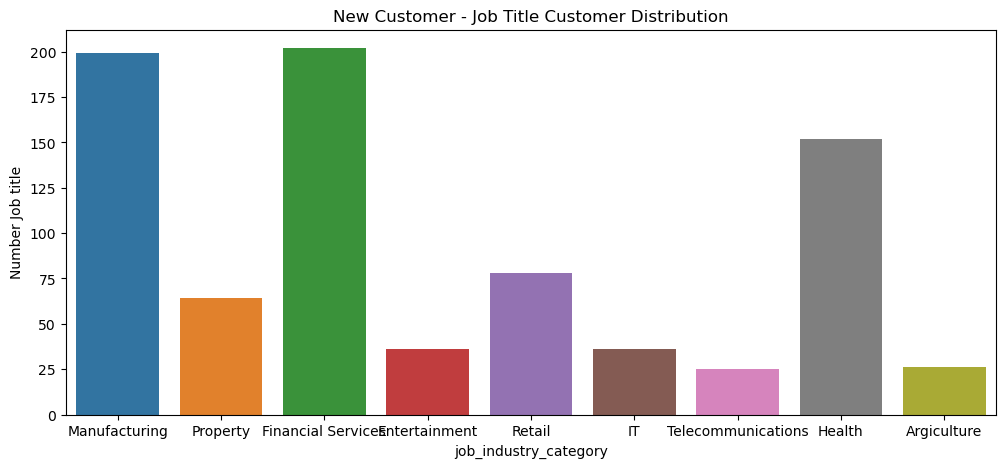

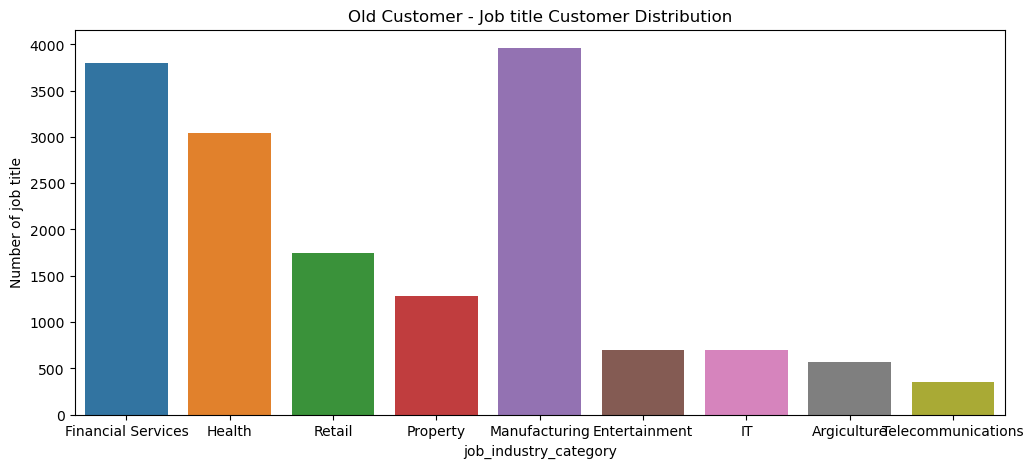

In [42]:
plt.figure(figsize = (12,5))
sns.countplot(x = 'job_industry_category', data = new_cust[~(new_cust['job_industry_category']=='Missing')])
plt.title('New Customer - Job Title Customer Distribution')
plt.ylabel('Number Job title')

plt.figure(figsize = (12,5))
sns.countplot(x = 'job_industry_category', data = cust_trans_rfm[~(cust_trans_rfm['job_industry_category']=='Missing')])
plt.title('Old Customer - Job title Customer Distribution')
plt.ylabel('Number of job title');

### 5. Wealth Segmentation by Age Group

    After Analysed Both tabel New customer and Old customer tables we found that -
    a) In accrros the all age grouop higehst Wealth segmentation is Mass Customer.
    b) AFter Mass customer, High Net Worth is also sencond high segmentation.
    c) and All segmentation highest lies age between 40-50 and 50-60 in both datsee
       new and old customer.

In [52]:
new_walth_age = new_cust.groupby(['wealth_segment', 'Age_group']).size().reset_index()
new_walth_age.rename(columns ={0 : 'Number of Customer'}, inplace = True)
new_walth_age

,wealth_segment,Age_group,Number of Customer
0,Affluent Customer,20-30,41
1,Affluent Customer,30-40,20
2,Affluent Customer,40-50,51
3,Affluent Customer,50-60,45
4,Affluent Customer,60-70,35
5,Affluent Customer,70-80,30
6,Affluent Customer,80-90,13
7,High Net Worth,20-30,30
8,High Net Worth,30-40,34
9,High Net Worth,40-50,52


In [56]:
old_walth_age = cust_trans_rfm.groupby(['wealth_segment', 'Age_group']).size().reset_index()
old_walth_age.rename(columns = {0: 'Number of Customer'}, inplace = True)

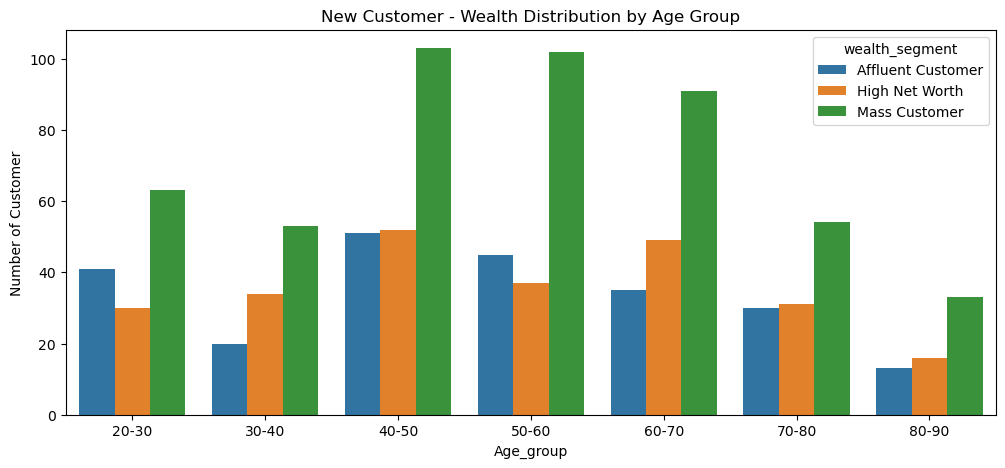

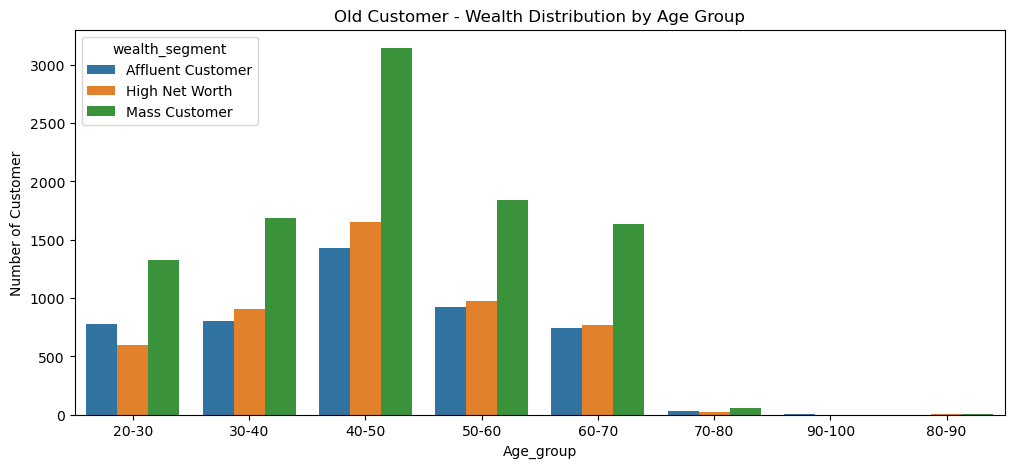

In [58]:
plt.figure(figsize = (12,5))
sns.barplot(x = 'Age_group', y = 'Number of Customer', data = new_walth_age, hue = 'wealth_segment' )
plt.title('New Customer - Wealth Distribution by Age Group')


plt.figure(figsize = (12,5))
sns.barplot(x = 'Age_group', y = 'Number of Customer', data = old_walth_age, hue = 'wealth_segment' )
plt.title('Old Customer - Wealth Distribution by Age Group');

### 6. Car owner across each State

    The customer base of the automobile bike company lies in New South Wales, Queensland and Victoria,
    Australia. In New South Wales (NSW) it seems there is a greater amount of people who donot own a car. 
    In Victoria (VIC) the proportion is evenly split. However in Queensland (QLD) there are relatively 
    more people who own the car.
    
    
    NSW has the largest number of people that donot own a car. It seems that a higher amount of data is collected from NSW compared to other states. In QLD the distribution between customers having a car or not having is even. In Victoria the number is split evenly. Both the numbers are significantly lower than that of NSW

In [17]:
cust_add_info = pd.read_csv('CustomerAddress_Cleaned.csv')

cust_trans_add = pd.merge(cust_trans_rfm, cust_add_info, left_on= 'customer_id', right_on = 'customer_id', how = 'inner')
cust_trans_add.head(2)

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,RFM_Score,Customer_title,Age_group,detail_cust_title,rank,address,postcode,state,country,property_valuation
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,...,211,Bronze,60-70,Almost Lost Customer,9,984 Hoepker Court,3064,VIC,Australia,6
1,11065,1,2950,2017-10-16,0.0,Approved,Giant Bicycles,Standard,medium,medium,...,211,Bronze,60-70,Almost Lost Customer,9,984 Hoepker Court,3064,VIC,Australia,6


In [73]:
state_car_info = cust_trans_add.groupby(['state', 'owns_car']).size().reset_index()
state_car_info.rename(columns = {0 : 'Number of Customer'}, inplace = True)
state_car_info

,state,owns_car,Number of Customer
0,NSW,No,5019
1,NSW,Yes,5308
2,QLD,No,2077
3,QLD,Yes,2058
4,VIC,No,2533
5,VIC,Yes,2332


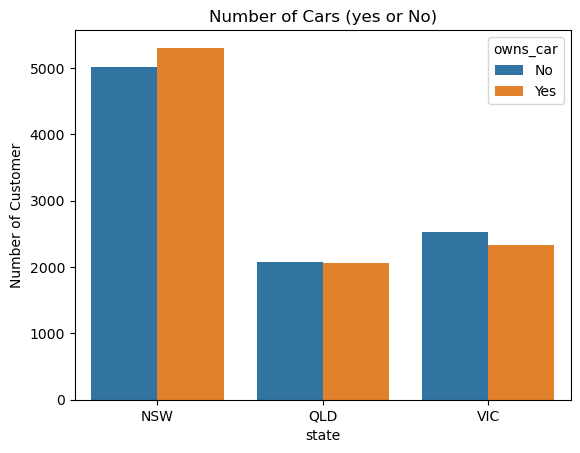

In [76]:

sns.barplot(x = 'state', y = 'Number of Customer', data = state_car_info, hue = 'owns_car')
plt.title('Number of Cars (yes or No)');

C:\Users\Anil modi\AppData\Local\Temp\ipykernel_12080\3827445276.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cust_trans_add['property_valuation'])


<Axes: xlabel='property_valuation', ylabel='Density'>

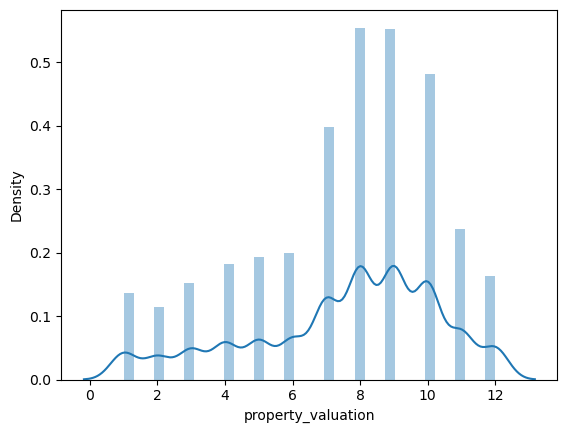

In [16]:
sns.distplot(cust_trans_add['property_valuation'])

### 7. RFM Analysis

### 7.1 Recency vs Monetry

    According to RFM Analysis, the chart show that-
    The Customer who purchase recently who generate more revemue as compare to who visit long timea ago.
    the customer who purchase recently almost (50 -100) who generate more revenue'
    and Purchase (200 +) day who generate lowst Revenue;

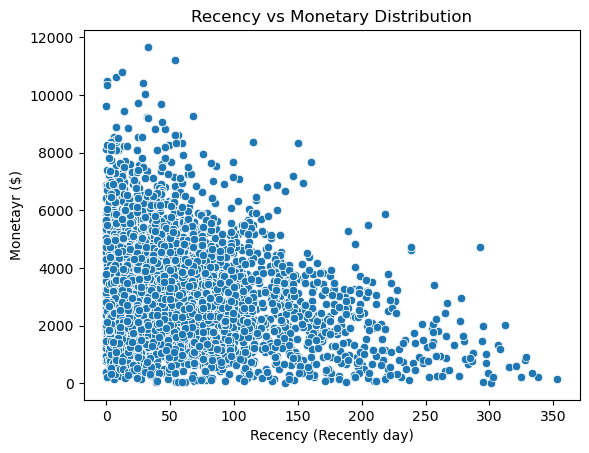

In [81]:
sns.scatterplot(x = 'Recency', y = 'Monetary', data = cust_trans_rfm)
plt.title('Recency vs Monetary Distribution')
plt.ylabel('Monetayr ($)')
plt.xlabel('Recency (Recently day)');

### 7.2 Frequency vs Monetry

   we know that according to chart the customer purchase frequently who generate more revene than low frequency day.

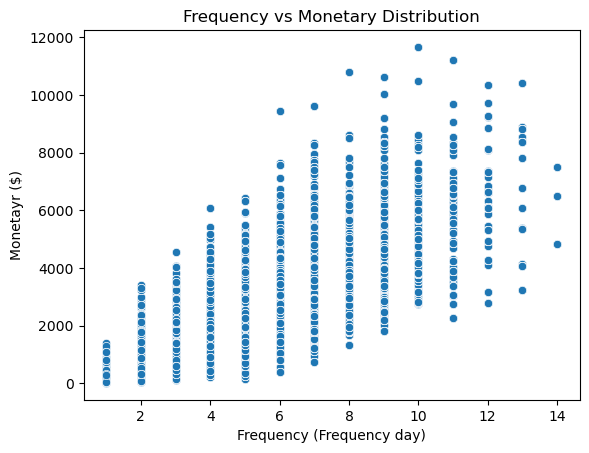

In [83]:
sns.scatterplot(x = 'Frequency', y = 'Monetary', data = cust_trans_rfm)
plt.title('Frequency vs Monetary Distribution')
plt.ylabel('Monetayr ($)')
plt.xlabel('Frequency (Frequency day)');

## 8. Customer Segment Distribution

In [86]:
customer_seg = cust_trans_rfm.groupby(['detail_cust_title', 'rank']).size().reset_index()
customer_seg.rename(columns = {0: 'Number of Customer'}, inplace = True)
customer_seg

,detail_cust_title,rank,Number of Customer
0,Almost Lost Customer,9,1629
1,Becoming Loyal,3,1967
2,Evasive Customer,10,1767
3,High Risk Customer,8,1816
4,Late Bloomer,6,1386
5,Loosing Customer,7,2591
6,Lost Customer,11,751
7,Platinum Customer,1,1556
8,Potential Customer,5,2300
9,Recent Customer,4,2174


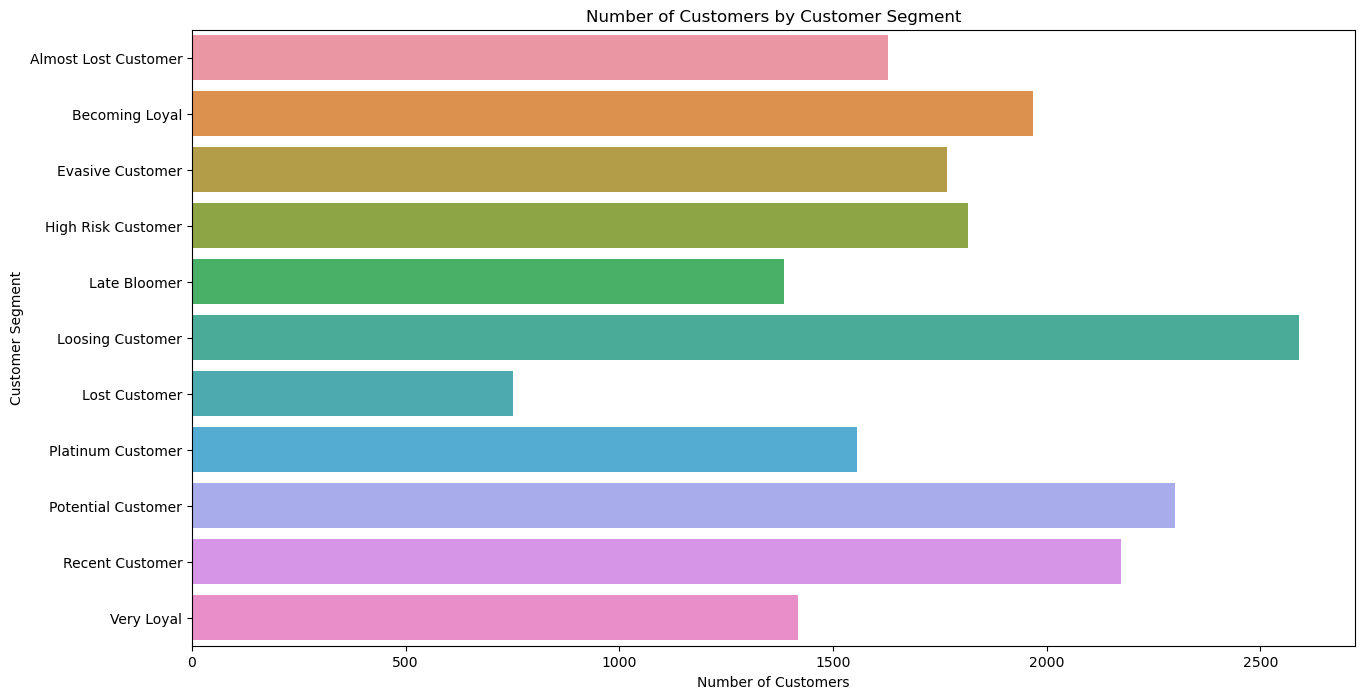

In [95]:
plt.figure(figsize=(15,8))
sns.barplot(y = 'detail_cust_title', x = 'Number of Customer', data = customer_seg, orient = 'h')
plt.xlabel('Number of Customers')
plt.ylabel('Customer Segment')
plt.title('Number of Customers by Customer Segment');

Text(0, 0.5, ' ')

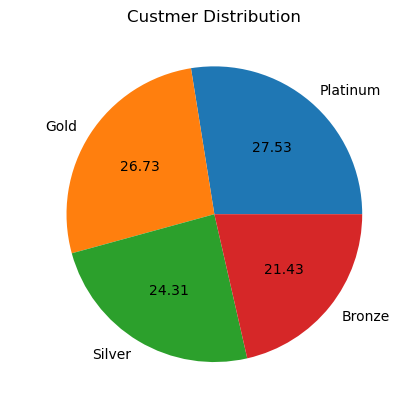

In [11]:
cust_trans_rfm['Customer_title'].value_counts().plot(kind = 'pie', autopct = '%.2f')
plt.title('Custmer Distribution')
plt.ylabel(' ')

In [34]:
top_cust = cust_trans_add.groupby(['first_name','last_name', 'job_title', 'postcode','address','rank', ]).size().reset_index().sort_values(by ='rank').head(20)

In [35]:
top_cust.drop(columns =0, inplace = True)

In [36]:
top_cust

,first_name,last_name,job_title,postcode,address,rank
2172,Marge,Girault,Registered Nurse,2099,06069 Hayes Road,1
1688,Jillie,Fyndon,Programmer Analyst IV,4132,8142 Tomscot Drive,1
3319,Wells,Pressman,Registered Nurse,4514,95 Eliot Street,1
2954,Slade,Semark,Missing,2036,11 Victoria Place,1
1695,Joachim,Amer,Research Assistant IV,4070,29 Portage Street,1
3063,Tatum,Askem,Executive Secretary,3179,77433 Sunfield Court,1
2698,Reggie,Mulliner,VP Accounting,2160,079 Merry Park,1
2301,Merola,Stutard,Account Coordinator,2153,84 Porter Alley,1
152,Ammamaria,Standbridge,Analog Circuit Design manager,3150,8044 Emmet Hill,1
1952,Leesa,Castleman,Sales Associate,2062,010 Namekagon Parkway,1
